#### Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from sklearn.pipeline import Pipeline


#### 1.Problem Statement

In [2]:
#Predicting the price of diamond

#### 2. Data Gathering

In [3]:
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


 #### 3. Exploratory data analysis EDA

In [4]:
df.shape

(53940, 10)

In [5]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
df.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
15682,0.90,Very Good,E,VVS2,62.2,60.0,6289,6.04,6.12,3.78
48843,0.55,Premium,E,VS2,61.1,58.0,2030,5.30,5.28,3.23
22303,1.54,Premium,I,VS1,61.6,58.0,10349,7.42,7.39,4.56
26379,2.05,Ideal,H,SI2,60.4,58.0,15857,8.21,8.27,4.98
74,0.30,Good,H,SI1,63.7,57.0,554,4.28,4.26,2.72
44547,0.54,Ideal,G,VS2,61.7,56.0,1605,5.21,5.24,3.23
51777,0.71,Premium,E,SI2,59.0,60.0,2410,5.90,5.87,3.47
35607,0.31,Very Good,H,VVS1,63.1,57.0,907,4.31,4.25,2.70
1891,0.76,Ideal,D,SI1,62.8,57.0,3075,5.81,5.85,3.66
52375,0.71,Very Good,F,SI1,59.0,61.0,2505,5.84,5.88,3.46


In [10]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [11]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [12]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [13]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

<AxesSubplot:xlabel='cut', ylabel='price'>

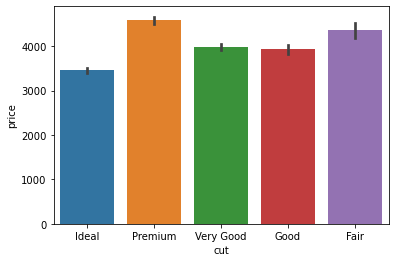

In [14]:
sns.barplot(df['cut'],df['price'])

Text(0.5, 1.0, 'Diamond cut for price')

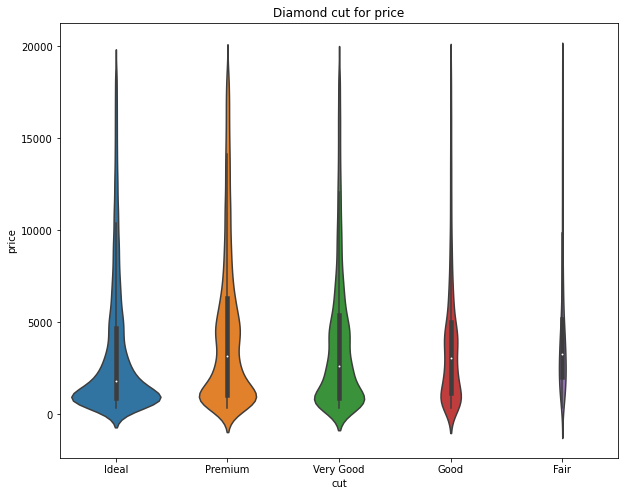

In [15]:
plt.figure(figsize=(10,8))
ax=sns.violinplot(x='cut',y='price',data=df,scale='count')
ax.set_title('Diamond cut for price')

<AxesSubplot:xlabel='color', ylabel='price'>

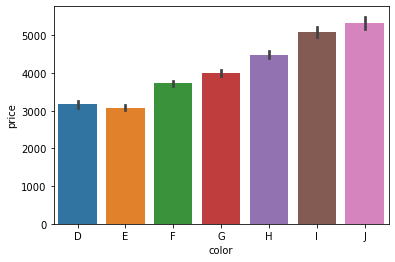

In [16]:
sns.barplot(df['color'],df['price'])

Text(0.5, 1.0, 'Diamond color for price')

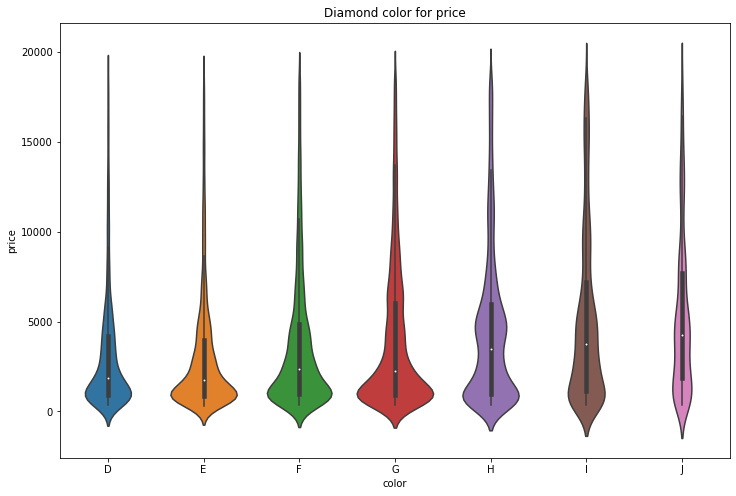

In [17]:
plt.figure(figsize=(12,8))
ax=sns.violinplot(x='color',y='price',data=df,scale='count')
ax.set_title('Diamond color for price')

<AxesSubplot:xlabel='clarity', ylabel='price'>

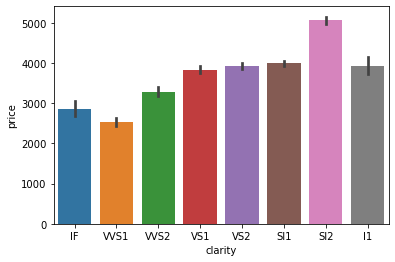

In [18]:
sns.barplot(df['clarity'],df['price'])

Text(0.5, 1.0, 'Diamond clarity for price')

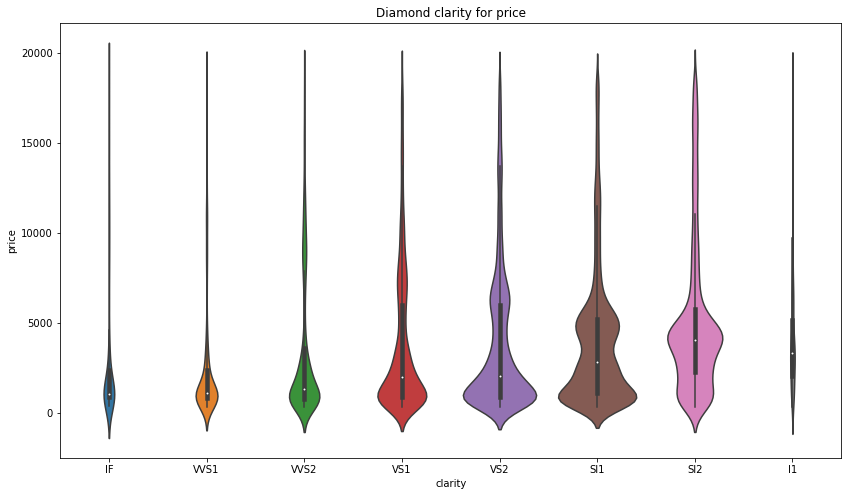

In [19]:
plt.figure(figsize=(14,8))
ax=sns.violinplot(x='clarity',y='price',data=df,scale='count')
ax.set_title('Diamond clarity for price')

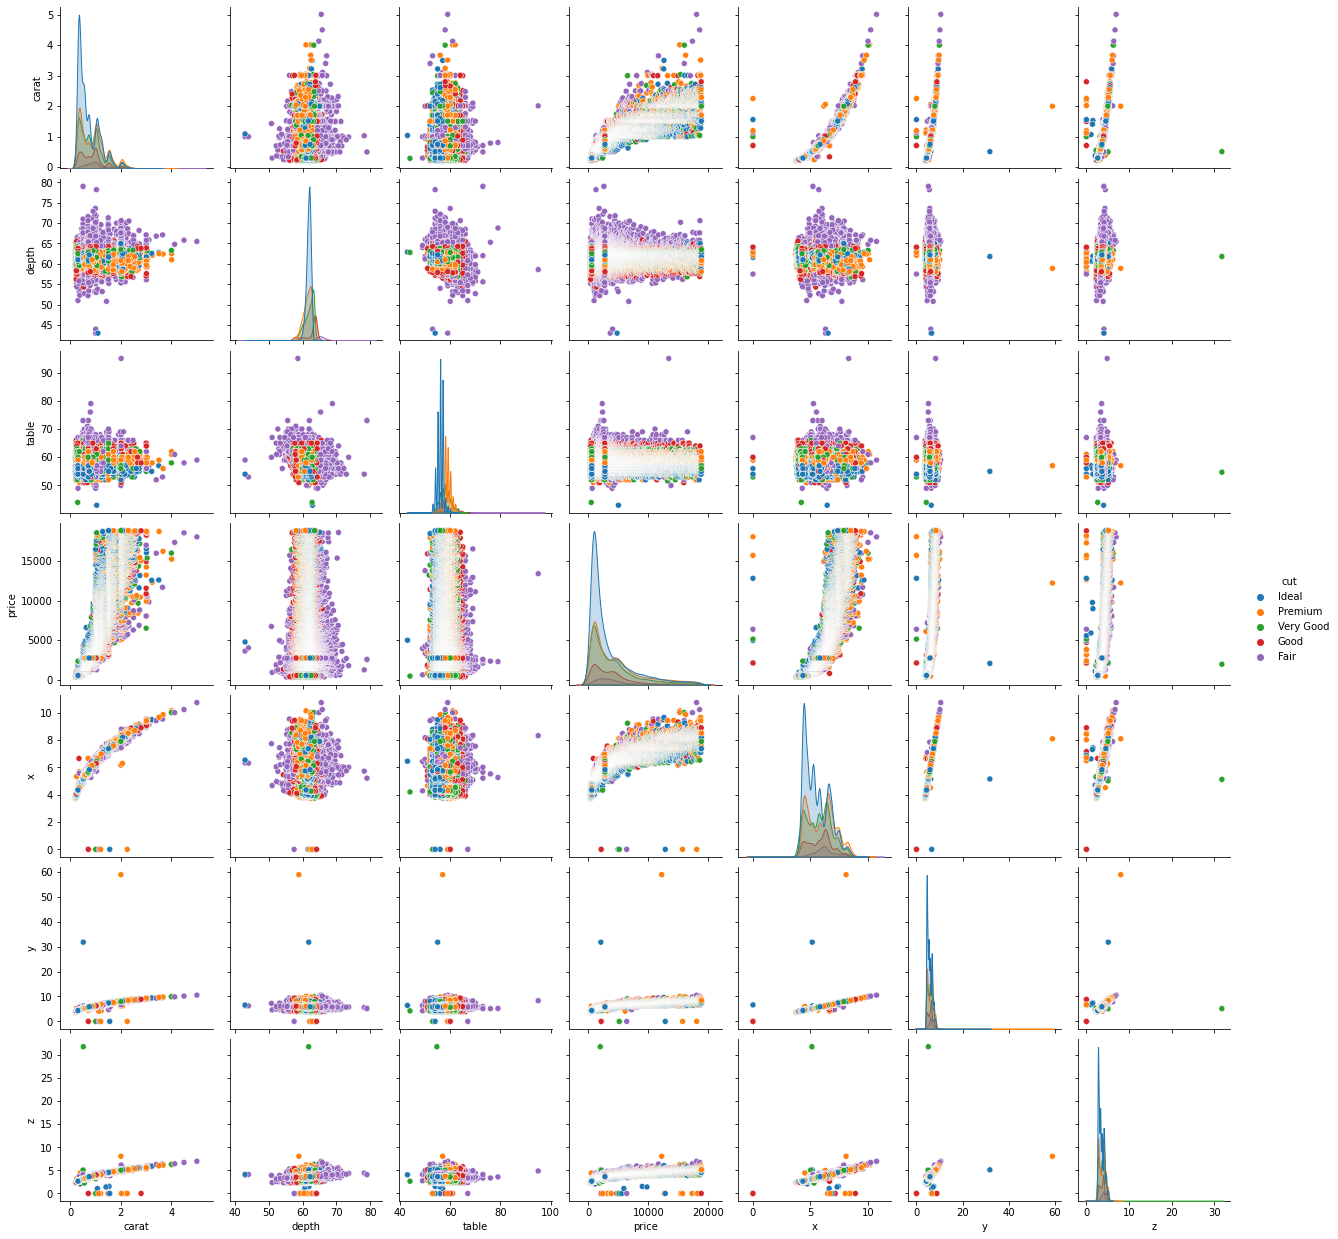

In [24]:
pp=sns.pairplot(df,hue='cut')

In [ ]:
##checking for outliears

<AxesSubplot:>

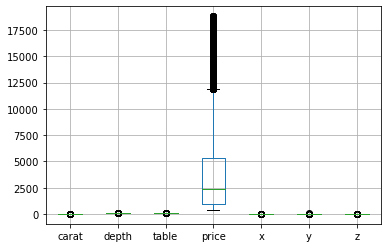

In [36]:
df.boxplot()

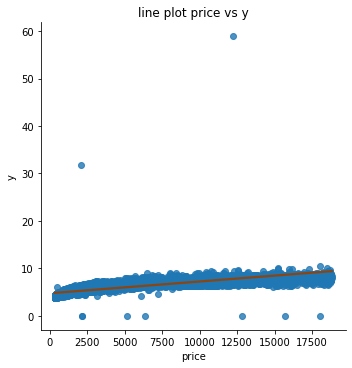

In [29]:
lm=sns.lmplot(x='price',y='y',data=df,line_kws={"color": "#8B4513"})
plt.title('line plot price vs y')
plt.show()

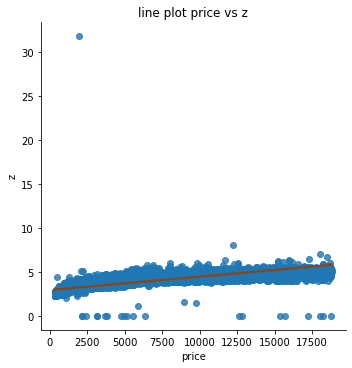

In [30]:
lm=sns.lmplot(x='price',y='z',data=df,line_kws={"color": "#8B4513"})
plt.title('line plot price vs z')
plt.show()

<AxesSubplot:xlabel='x'>

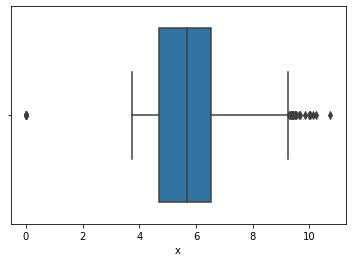

In [38]:
sns.boxplot(x=df['x'])

<AxesSubplot:xlabel='y'>

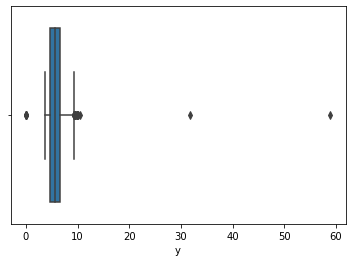

In [41]:
sns.boxplot(x=df['y'])

<AxesSubplot:xlabel='z'>

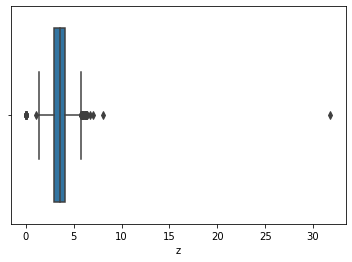

In [42]:
sns.boxplot(x=df['z'])

<AxesSubplot:xlabel='z'>

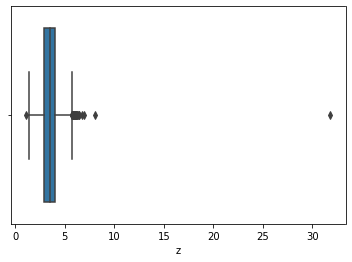

In [67]:
sns.boxplot(x=df['z'])

<AxesSubplot:xlabel='depth'>

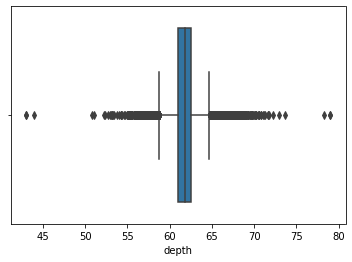

In [43]:
sns.boxplot(x=df['depth'])

<AxesSubplot:xlabel='table'>

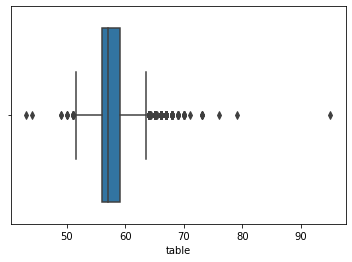

In [45]:
sns.boxplot(x=df['table'])

In [56]:
df.loc[df['y']==0,'y']=np.nan
df.loc[df['z']==0,'z']=np.nan

In [58]:
df.isnuldf.loc[df['y']==0,'y']=np.nan
df.loc[df['z']==0,'z']=np.nanl().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [64]:
df['x'].fillna(df['x'].mean(),inplace=True)
df['y'].fillna(df['y'].mean(),inplace=True)
df['z'].fillna(df['z'].mean(),inplace=True)

In [65]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [66]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.732007,5.735270,3.540046
std,0.474011,1.432621,2.234491,3989.439738,1.119587,1.140265,0.702400
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [69]:
df=df[(df['depth']>50)&(df['depth']<75)]
df=df[(df['table']>40)&(df['table']<80)]
df=df[(df['y']<20)]
df=df[(df['z']<20)]

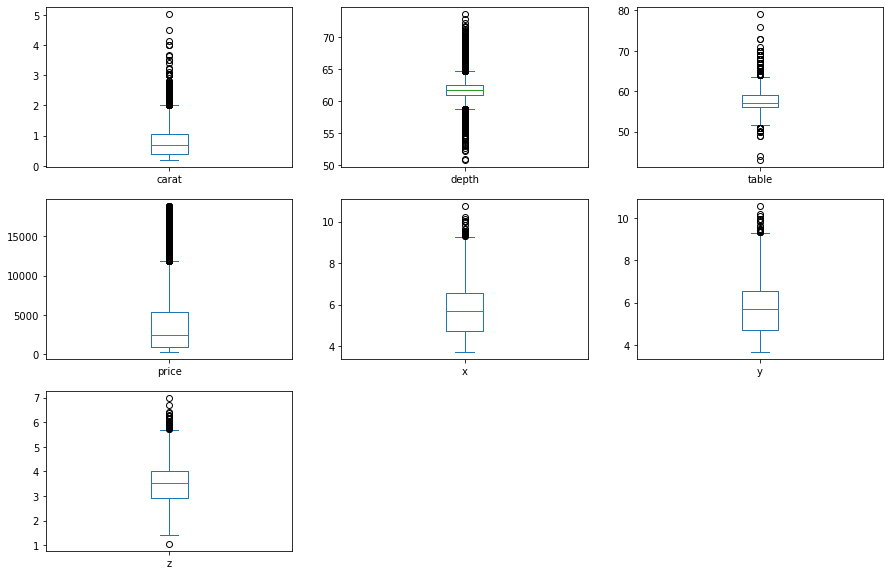

In [70]:
df.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [97]:
#encoding categorical values
columns=['cut','color','clarity']
label_encoder=LabelEncoder()

for i in columns:
    df[i]=label_encoder.fit_transform(df[i])
    
df.describe()    

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,0.797899,2.553273,2.594252,3.835212,61.749594,57.456199,3932.629538,5.731921,5.733753,3.539318
std,0.473987,1.027424,1.701116,1.724602,1.420393,2.226582,3989.398707,1.119568,1.111427,0.691483
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.250000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.750000,6.540000,6.540000,4.030000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


In [98]:
#correlation matrix
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017250,0.291420,-0.214233,0.029206,0.181694,0.921594,0.977639,0.976724,0.975899
cut,0.017250,1.000000,0.000209,0.028150,-0.195761,0.152227,0.039917,0.022097,0.027954,0.000904
color,0.291420,0.000209,1.000000,-0.027835,0.048939,0.026915,0.172479,0.270739,0.270536,0.274973
clarity,-0.214233,0.028150,-0.027835,1.000000,-0.053374,-0.088398,-0.071505,-0.226059,-0.223112,-0.229735
depth,0.029206,-0.195761,0.048939,-0.053374,1.000000,-0.302238,-0.010230,-0.024505,-0.027642,0.097548
table,0.181694,0.152227,0.026915,-0.088398,-0.302238,1.000000,0.126933,0.196230,0.190047,0.155698
price,0.921594,0.039917,0.172479,-0.071505,-0.010230,0.126933,1.000000,0.886992,0.888585,0.881525
x,0.977639,0.022097,0.270739,-0.226059,-0.024505,0.196230,0.886992,1.000000,0.998652,0.990794
y,0.976724,0.027954,0.270536,-0.223112,-0.027642,0.190047,0.888585,0.998652,1.000000,0.990461
z,0.975899,0.000904,0.274973,-0.229735,0.097548,0.155698,0.881525,0.990794,0.990461,1.000000


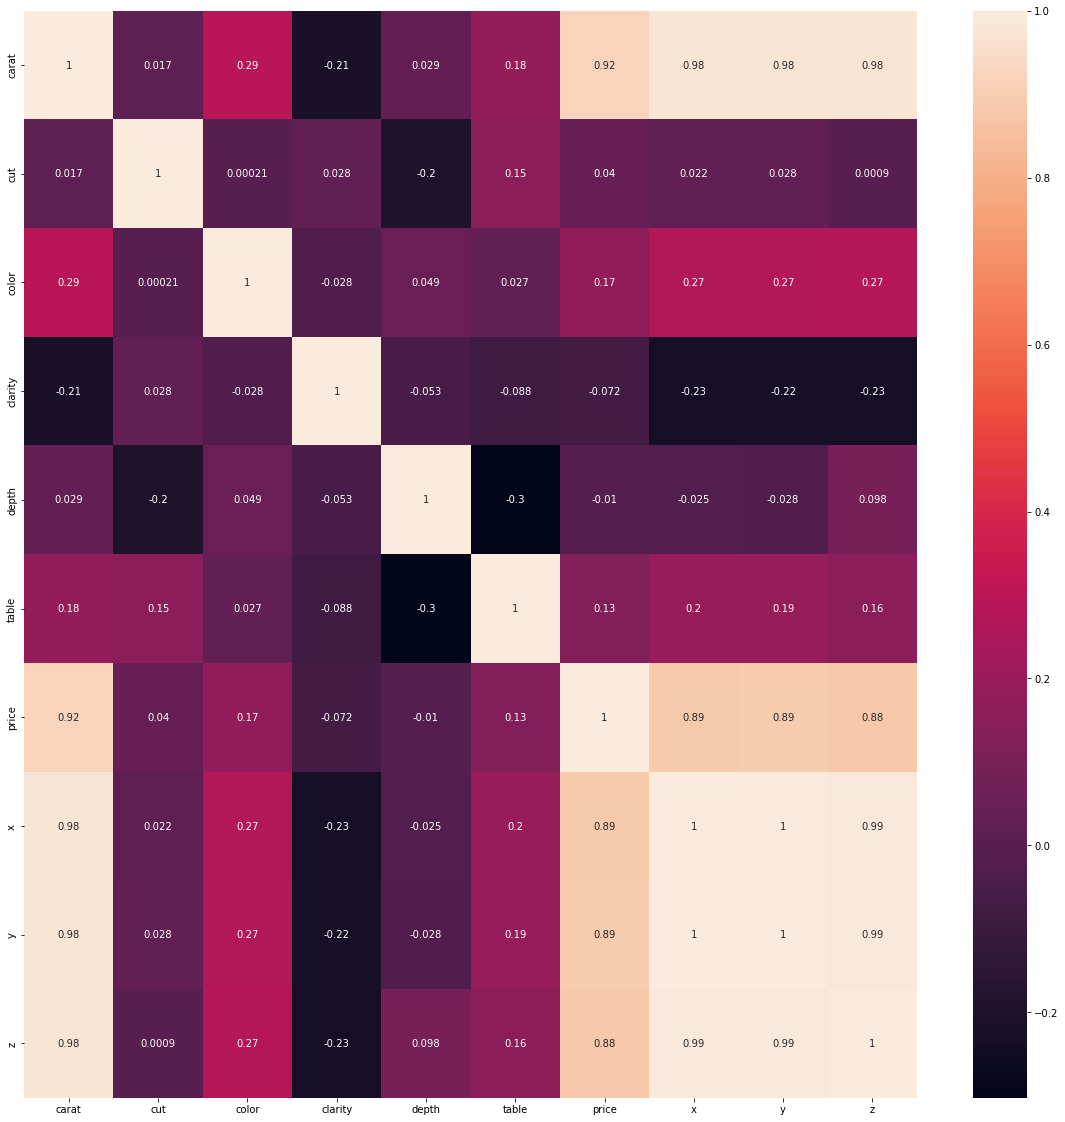

In [99]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [100]:
#model building
x=df.drop(['price'],axis=1)
y=df['price']

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [104]:
lr=LinearRegression()

In [107]:
lr.fit(x_train,y_train)

LinearRegression()

In [108]:
#Building pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),('lr',LinearRegression())])

pipeline_lasso=Pipeline([('scalar2',StandardScaler()),('lasso',Lasso())])

pipeline_dt=Pipeline([('scalar3',StandardScaler()),('dt',DecisionTreeRegressor())])

pipeline_rf=Pipeline([('scalar4',StandardScaler()),('rf',RandomForestRegressor())])

pipeline_kn=Pipeline([('scalar5',StandardScaler()),('kn',KNeighborsRegressor())])

pipeline_xgb=Pipeline([('scalar6',StandardScaler()),('xgb',XGBRegressor())])

pipelines=[pipeline_lr,pipeline_lasso,pipeline_dt,pipeline_rf,pipeline_kn,pipeline_xgb]

pipeline_dict={0:'LinearRegression',1:'lasso',2:'DecisionTree',3:'Randomforest',4:'KNN',5:'XGB'}

for pipe in pipelines:
    pipe.fit(x_train,y_train)

In [109]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 1338.321565 
lasso: 1339.080854 
DecisionTree: 742.721619 
Randomforest: 549.398941 
KNN: 817.469984 
XGB: 542.712358 


In [111]:
pred = pipeline_xgb.predict(x_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

R^2: 0.9818968223956757
Adjusted R^2: 0.9818817028152712


In [112]:
pred = pipeline_xgb.predict(x_train)
print("R^2:",metrics.r2_score(y_train, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_train, pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))

R^2: 0.9911826484160405
Adjusted R^2: 0.9911808086570509
